### ** Neighborhoods**

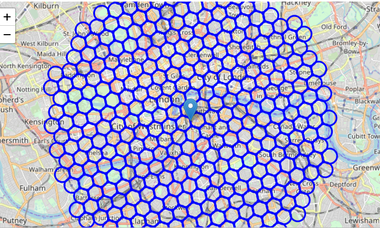

In [0]:
from IPython.display import Image
Image(filename='battle.png',width=800, height=400)

**Problem Background:**



The City of New York, is the most populous city in the United States. It is diverse and is the financial capital of USA. It is multicultural. It provides lot of business oppourtunities and business friendly environment. It has attracted many different players into the market. It is a global hub of business and commerce. The city is a major center for banking and finance, retailing, world trade, transportation, tourism, real estate, new media, traditional media, advertising, legal services, accountancy, insurance, theater, fashion, and the arts in the United States.

This also means that the market is highly competitive. As it is highly developed city so cost of doing business is also one of the highest. Thus, any new business venture or expansion needs to be analysed carefully. The insights derived from analysis will give good understanding of the business environment which help in strategically targeting the market. This will help in reduction of risk. And the Return on Investment will be reasonable.

**Problem Description:**

A restaurant is a business which prepares and serves food and drink to customers in return for money, either paid before the meal, after the meal, or with an open account. The City of New York is famous for its excelllent cuisine. It's food culture includes an array of international cuisines influenced by the city's immigrant history.

Central and Eastern European immigrants, especially Jewish immigrants - bagels, cheesecake, hot dogs, knishes, and delicatessens
Italian immigrants - New York-style pizza and Italian cuisine
Jewish immigrants and Irish immigrants - pastrami and corned beef
Chinese and other Asian restaurants, sandwich joints, trattorias, diners, and coffeehouses are ubiquitous throughout the city
mobile food vendors - Some 4,000 licensed by the city
Middle Eastern foods such as falafel and kebabs examples of modern New York street food
It is famous for not just Pizzerias, Cafe's but also for fine dining Michelin starred restaurants.The city is home to "nearly one thousand of the finest and most diverse haute cuisine restaurants in the world", according to Michelin.
So it is evident that to survive in such competitive market it is very important to startegically plan. Various factors need to be studied inorder to decide on the Location such as :

New York Population
New York City Demographics
Are there any Farmers Markets, Wholesale markets etc nearby so that the ingredients can be purchased fresh to maintain quality and cost?
Are there any venues like Gyms, Entertainmnet zones, Parks etc nearby where floating population is high etc
Who are the competitors in that location?
Cuisine served / Menu of the competitors
Segmentation of the Borough
Untapped markets
Saturated markets etc
The list can go on...
Eventhough well funded XYZ Company Ltd. need to choose the correct location to start its first venture.If this is successful they can replicate the same in other locations. First move is very important, thereby choice of location is very important.

**Target Audience:**

To recommend the correct location, XYZ Company Ltd has appointed me to lead of the Data Science team. The objective is to locate and recommend to the management which neighborhood of Newyork city will be best choice to start a restaurant. The Management also expects to understand the rationale of the recommendations made.

This would interest anyone who wants to start a new restaurant in Newyork city.

**Success Criteria:**

The success criteria of the project will be a good recommendation of borough/Neighborhood choice to XYZ Company Ltd based on Lack of such restaurants in that location and nearest suppliers of ingredients.

In [0]:
import numpy as np
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json
from geopy.geocoders import Nominatim 
import requests
from pandas.io.json import json_normalize 
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
import folium

**Data Preparation**


**Preprocessing**

In [0]:
#Download the data and change into df
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('ok, Data downloaded!')


ok, Data downloaded!


In [0]:
with open('newyork_data.json') as json_data:
    new_york_data = json.load(json_data)
neighborhoods_data = new_york_data['features']
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
neighborhoods = pd.DataFrame(columns=column_names)
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [0]:
neighborhoods.head(5)

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [0]:
#Filtering Staten Island
neighborhoods['Borough'].unique()


array(['Bronx', 'Manhattan', 'Brooklyn', 'Queens', 'Staten Island'],
      dtype=object)

In [0]:
Q = neighborhoods[neighborhoods['Borough'] == 'Queens']
print(Q.head())

    Borough     Neighborhood   Latitude  Longitude
129  Queens          Astoria  40.768509 -73.915654
130  Queens         Woodside  40.746349 -73.901842
131  Queens  Jackson Heights  40.751981 -73.882821
132  Queens         Elmhurst  40.744049 -73.881656
133  Queens     Howard Beach  40.654225 -73.838138


### **Data Visualization** 
 

### **Map**

In [0]:
address = 'Queens, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
# create map of Manhattan using latitude and longitude values
map_SI = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(Q['Latitude'], Q['Longitude'], Q['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_SI)  
    
map_SI

In [0]:
print(Q['Neighborhood'].unique())
print(Q['Neighborhood'].count())

['Astoria' 'Woodside' 'Jackson Heights' 'Elmhurst' 'Howard Beach' 'Corona'
 'Forest Hills' 'Kew Gardens' 'Richmond Hill' 'Flushing'
 'Long Island City' 'Sunnyside' 'East Elmhurst' 'Maspeth' 'Ridgewood'
 'Glendale' 'Rego Park' 'Woodhaven' 'Ozone Park' 'South Ozone Park'
 'College Point' 'Whitestone' 'Bayside' 'Auburndale' 'Little Neck'
 'Douglaston' 'Glen Oaks' 'Bellerose' 'Kew Gardens Hills' 'Fresh Meadows'
 'Briarwood' 'Jamaica Center' 'Oakland Gardens' 'Queens Village' 'Hollis'
 'South Jamaica' 'St. Albans' 'Rochdale' 'Springfield Gardens'
 'Cambria Heights' 'Rosedale' 'Far Rockaway' 'Broad Channel'
 'Breezy Point' 'Steinway' 'Beechhurst' 'Bay Terrace' 'Edgemere' 'Arverne'
 'Rockaway Beach' 'Neponsit' 'Murray Hill' 'Floral Park' 'Holliswood'
 'Jamaica Estates' 'Queensboro Hill' 'Hillcrest' 'Ravenswood' 'Lindenwood'
 'Laurelton' 'Lefrak City' 'Belle Harbor' 'Rockaway Park' 'Somerville'
 'Brookville' 'Bellaire' 'North Corona' 'Forest Hills Gardens'
 'Jamaica Hills' 'Utopia' 'Pomonok' '

In [0]:
Q_Hill = Q[Q['Neighborhood'].str.contains('Hill')].reset_index(drop=True)
Q_Hill

,Borough,Neighborhood,Latitude,Longitude
0,Queens,Forest Hills,40.725264,-73.844475
1,Queens,Richmond Hill,40.697947,-73.831833
2,Queens,Kew Gardens Hills,40.722578,-73.820878
3,Queens,Murray Hill,40.764126,-73.812763
4,Queens,Queensboro Hill,40.744572,-73.825809
5,Queens,Hillcrest,40.723825,-73.797603
6,Queens,Forest Hills Gardens,40.714611,-73.841022
7,Queens,Jamaica Hills,40.711460,-73.796465


### **Call for API**

In [0]:
 # my Foursquare ID
CLIENT_ID = '2J3XO1E0RDBSF4AC0TLAN40ATHSOPQHCBOAP2E5YHMSKIJBG'
# my Foursquare Secret
CLIENT_SECRET = '12NM3DUM3301G405FRFYFS4JHTDWSUD0SXN32IPXOK1HANUC' 
# Foursquare API version
VERSION = '20180605'
 
  

**Get Venue Catogory**


In [0]:
neighborhood_latitude = Q_Hill.loc[0, 'Latitude']
neighborhood_longitude = Q_Hill.loc[0, 'Longitude']
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=2J3XO1E0RDBSF4AC0TLAN40ATHSOPQHCBOAP2E5YHMSKIJBG&client_secret=12NM3DUM3301G405FRFYFS4JHTDWSUD0SXN32IPXOK1HANUC&v=20180605&ll=40.72526378216503,-73.84447500788983&radius=1000&limit=100'

#### Send the GET Request and examine the results

In [0]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e2a431e760a7f001bcc93d7'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-4b7ff72ff964a520684730e3-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bagels_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d179941735',
         'name': 'Bagel Shop',
         'pluralName': 'Bagel Shops',
         'primary': True,
         'shortName': 'Bagels'}],
       'delivery': {'id': '74362',
        'provider': {'icon': {'name': '/delivery_provider_seamless_20180129.png',
          'prefix': 'https://fastly.4sqi.net/img/general/cap/',
          'sizes': [40, 50]},
         'name': 'seamless'},
        'url': 'https://www.seamless.com/menu/forest-hills-bagels-104-41-queens-blvd-forest-hills/74362?affiliate=1131&utm_source=foursqua

#### Get relevant part of JSON and transform it into a *pandas* dataframe

In [0]:
# assign relevant part of JSON to venues
venues = results['response']['groups'][0]['items']

# tranform venues into a dataframe
nearby = json_normalize(venues)
nearby.head()

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.postalCode,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.delivery.id,venue.delivery.url,venue.delivery.provider.name,venue.delivery.provider.icon.prefix,venue.delivery.provider.icon.sizes,venue.delivery.provider.icon.name,venue.photos.count,venue.photos.groups,venue.location.crossStreet,venue.venuePage.id,venue.location.neighborhood
0,e-0-4b7ff72ff964a520684730e3-0,0,"[{'summary': 'This spot is popular', 'type': '...",4b7ff72ff964a520684730e3,Forest Hills Bagels,10441 Queens Blvd,40.723600,-73.847820,"[{'label': 'display', 'lat': 40.7236, 'lng': -...",337,11375,US,Forest Hills,NY,United States,"[10441 Queens Blvd, Forest Hills, NY 11375, Un...","[{'id': '4bf58dd8d48988d179941735', 'name': 'B...",74362,https://www.seamless.com/menu/forest-hills-bag...,seamless,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_seamless_20180129.png,0,[],NaN,NaN,NaN
1,e-0-4c377a13ae2da59377f4fec5-1,0,"[{'summary': 'This spot is popular', 'type': '...",4c377a13ae2da59377f4fec5,Yellowstone Park,Yellowstone Blvd,40.726251,-73.847759,"[{'label': 'display', 'lat': 40.72625056917445...",298,11375,US,Forest Hills,NY,United States,"[Yellowstone Blvd (68th Road), Forest Hills, N...","[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",NaN,NaN,NaN,NaN,NaN,NaN,0,[],68th Road,NaN,NaN
2,e-0-51c3a999498e5db561b5346a-2,0,"[{'summary': 'This spot is popular', 'type': '...",51c3a999498e5db561b5346a,iLoveKickboxing,106-06 Queens Blvd,40.721522,-73.847939,"[{'label': 'display', 'lat': 40.72152151184081...",508,11375,US,Forest Hills,NY,United States,"[106-06 Queens Blvd, Forest Hills, NY 11375, U...","[{'id': '52f2ab2ebcbc57f1066b8b47', 'name': 'B...",NaN,NaN,NaN,NaN,NaN,NaN,0,[],NaN,NaN,NaN
3,e-0-49e28781f964a52037621fe3-3,0,"[{'summary': 'This spot is popular', 'type': '...",49e28781f964a52037621fe3,Martha's Country Bakery,70-28 Austin St,40.720558,-73.845883,"[{'label': 'display', 'lat': 40.72055824017992...",537,11375,US,Forest Hills,NY,United States,"[70-28 Austin St, Forest Hills, NY 11375, Unit...","[{'id': '4bf58dd8d48988d16a941735', 'name': 'B...",NaN,NaN,NaN,NaN,NaN,NaN,0,[],NaN,398073220,NaN
4,e-0-514522b8e4b039103723954f-4,0,"[{'summary': 'This spot is popular', 'type': '...",514522b8e4b039103723954f,Banter,108-22 Queens Blvd,40.720820,-73.843169,"[{'label': 'display', 'lat': 40.7208198988685,...",506,11375,US,Forest Hills,NY,United States,"[108-22 Queens Blvd (at 71st Rd.), Forest Hill...","[{'id': '4bf58dd8d48988d116941735', 'name': 'B...",NaN,NaN,NaN,NaN,NaN,NaN,0,[],at 71st Rd.,NaN,NaN


#### Define information of interest and filter dataframe

In [0]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_filtered = nearby.loc[:, filtered_columns]
 # function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
nearby_filtered['venue.categories'] = nearby_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
nearby_filtered.columns = [column.split('.')[-1] for column in nearby_filtered.columns]

nearby_filtered.head(5)

,name,categories,lat,lng
0,Forest Hills Bagels,Bagel Shop,40.723600,-73.847820
1,Yellowstone Park,Park,40.726251,-73.847759
2,iLoveKickboxing,Boxing Gym,40.721522,-73.847939
3,Martha's Country Bakery,Bakery,40.720558,-73.845883
4,Banter,Bar,40.720820,-73.843169


In [0]:
nearby_venues=nearby_filtered
#And how many venues were returned by Foursquare?
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


#### Let's visualize the Italian restaurants that are nearby

In [0]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Conrad Hotel',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(nearby_venues.lat, nearby_venues.lng, nearby_venues.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

## Statistics of Queens County and around


In [0]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['id'],
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue ID',
                  'Venue Category']
    
    return(nearby_venues)

In [0]:
Q_venues = getNearbyVenues(names=Q_Hill['Neighborhood'],
                                   latitudes=Q_Hill['Latitude'],
                                   longitudes=Q_Hill['Longitude']
                                  )

Forest Hills
Richmond Hill
Kew Gardens Hills
Murray Hill
Queensboro Hill
Hillcrest
Forest Hills Gardens
Jamaica Hills


In [0]:
Q_venues.groupby('Neighborhood').count()


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue ID,Venue Category
Neighborhood,,,,,,,
Forest Hills,39,39,39,39,39,39,39
Forest Hills Gardens,22,22,22,22,22,22,22
Hillcrest,20,20,20,20,20,20,20
Jamaica Hills,27,27,27,27,27,27,27
Kew Gardens Hills,18,18,18,18,18,18,18
Murray Hill,47,47,47,47,47,47,47
Queensboro Hill,23,23,23,23,23,23,23
Richmond Hill,24,24,24,24,24,24,24


##  Analyze Each Neighborhood

In [0]:
# one hot encoding
Q_onehot = pd.get_dummies(Q_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Q_onehot['Neighborhood'] = Q_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Q_onehot.columns[-1]] + list(Q_onehot.columns[:-1])
Q_onehot = Q_onehot[fixed_columns]

Q_onehot.head()

,Neighborhood,Asian Restaurant,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Bath House,Breakfast Spot,Bus Station,Bus Stop,Business Service,Café,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Coffee Shop,College Academic Building,College Basketball Court,College Cafeteria,Convenience Store,Cosmetics Shop,Dance Studio,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Donut Shop,Dry Cleaner,Dumpling Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fried Chicken Joint,Frozen Yogurt Shop,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Harbor / Marina,Hobby Shop,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Karaoke Bar,Korean Restaurant,Latin American Restaurant,Liquor Store,Lounge,Market,Martial Arts Dojo,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Moving Target,New American Restaurant,Noodle House,Optical Shop,Park,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pub,Ramen Restaurant,Sandwich Place,Shipping Store,Shopping Mall,Smoke Shop,Snack Place,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Supermarket,Supplement Shop,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Wine Bar,Yoga Studio
0,Forest Hills,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Forest Hills,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Forest Hills,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Forest Hills,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Forest Hills,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [0]:
Q_grouped =Q_onehot.groupby('Neighborhood').mean().reset_index()
Q_grouped

,Neighborhood,Asian Restaurant,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Bath House,Breakfast Spot,Bus Station,Bus Stop,Business Service,Café,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Coffee Shop,College Academic Building,College Basketball Court,College Cafeteria,Convenience Store,Cosmetics Shop,Dance Studio,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Donut Shop,Dry Cleaner,Dumpling Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fried Chicken Joint,Frozen Yogurt Shop,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Harbor / Marina,Hobby Shop,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Karaoke Bar,Korean Restaurant,Latin American Restaurant,Liquor Store,Lounge,Market,Martial Arts Dojo,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Moving Target,New American Restaurant,Noodle House,Optical Shop,Park,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pub,Ramen Restaurant,Sandwich Place,Shipping Store,Shopping Mall,Smoke Shop,Snack Place,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Supermarket,Supplement Shop,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Wine Bar,Yoga Studio
0,Forest Hills,0.025641,0.000000,0.000000,0.025641,0.025641,0.025641,0.000000,0.000000,0.000000,0.000000,0.000000,0.025641,0.000000,0.000000,0.025641,0.000000,0.000000,0.0,0.00,0.00,0.051282,0.000000,0.000000,0.025641,0.000000,0.00,0.000000,0.000000,0.025641,0.025641,0.000000,0.025641,0.000000,0.000000,0.000000,0.000000,0.00,0.025641,0.000000,0.000000,0.000000,0.076923,0.076923,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.025641,0.000000,0.000000,0.000000,0.000000,0.025641,0.000000,0.00,0.025641,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025641,0.051282,0.025641,0.000000,0.000000,0.051282,0.051282,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.025641,0.000000,0.025641,0.000000,0.025641,0.025641,0.000000,0.000000,0.051282,0.000000,0.025641,0.000000,0.051282
1,Forest Hills Gardens,0.000000,0.000000,0.000000,0.045455,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.045455,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,0.045455,0.00,0.000000,0.000000,0.000000,0.045455,0.000000,0.000000,0.000000,0.00,0.000000,0.045455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.045455,0.000000,0.000000,0.000000,0.045455,0.045455,0.000000,0.045455,0.000000,0.000000,0.000000,0.090909,0.045455,0.045455,0.045455,0.000000,0.045455,0.090909,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,0.045455,0.000000,0.000000,0.000000,0.000000,0.000000
2,Hillcrest,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.1,0.05,0.05,0.050000,0.000000,0.000000,0.000000,0.000000,0.05,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.05,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.05,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.05,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Jamaica Hills,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037037,0.000000,0.037037,0.000000,0.000000,0.037037,0.074074,0.000000,0.037037,0.

#### Let's put that into a *pandas* dataframe

In [0]:
# First, let's write a function to sort the venues in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [0]:
#Now let's create the new dataframe and display the top 5 venues for each neighborhood.
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Q_grouped['Neighborhood']

for ind in np.arange(Q_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Q_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Forest Hills,Gym / Fitness Center,Gym,Yoga Studio,Convenience Store,Pizza Place
1,Forest Hills Gardens,Sandwich Place,Bakery,Pharmacy,Ice Cream Shop,Food & Drink Shop
2,Hillcrest,Grocery Store,Donut Shop,College Academic Building,Ice Cream Shop,Shipping Store
3,Jamaica Hills,Pharmacy,Halal Restaurant,Fried Chicken Joint,Chinese Restaurant,Indian Restaurant
4,Kew Gardens Hills,Bank,Playground,Pizza Place,Bus Station,Sushi Restaurant


## Cluster Neighborhoods
Run *k*-means to cluster the neighborhood into 5 clusters.

In [0]:
# set number of clusters
kclusters = 5

Q_grouped_clustering = Q_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Q_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 2, 4, 2, 3, 0, 3, 1], dtype=int32)

Finally, let's visualize the resulting clusters

In [0]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Q_merged=Q_Hill

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Q_merged = Q_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Q_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Queens,Forest Hills,40.725264,-73.844475,2,Gym / Fitness Center,Gym,Yoga Studio,Convenience Store,Pizza Place
1,Queens,Richmond Hill,40.697947,-73.831833,1,Latin American Restaurant,Bank,Lounge,Pizza Place,Caribbean Restaurant
2,Queens,Kew Gardens Hills,40.722578,-73.820878,3,Bank,Playground,Pizza Place,Bus Station,Sushi Restaurant
3,Queens,Murray Hill,40.764126,-73.812763,0,Korean Restaurant,Bank,Bar,Supermarket,Coffee Shop
4,Queens,Queensboro Hill,40.744572,-73.825809,3,Chinese Restaurant,Bakery,Bank,Asian Restaurant,Bus Station


In [0]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Q_merged['Latitude'], Q_merged['Longitude'], Q_merged['Neighborhood'], Q_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Menu for Each Venue and likes


In [0]:

Q_menu = Q_venues[Q_venues['Venue Category'].str.contains('Fast Food Restaurant|Mexican Restaurant|Italian Restaurant|Sandwich Place')].reset_index(drop=True)
Q_menu.head(5)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue ID,Venue Category
0,Forest Hills,40.725264,-73.844475,Numero 28,40.720853,-73.845614,5a8237ddb6eedb04cf7abbf4,Italian Restaurant
1,Richmond Hill,40.697947,-73.831833,Subway,40.699763,-73.831184,4ca15337542b224b99de0da0,Sandwich Place
2,Hillcrest,40.723825,-73.797603,Burger King,40.722968,-73.794978,4bcb1e66cc8cd13a38afbecf,Fast Food Restaurant
3,Forest Hills Gardens,40.714611,-73.841022,Happy Fresh Tortilla Grill,40.718962,-73.841342,4ba3f7a9f964a520847238e3,Mexican Restaurant
4,Forest Hills Gardens,40.714611,-73.841022,Sammie's To Go,40.719033,-73.841545,4fce31f4e4b0fb844df7a09e,Sandwich Place


In [0]:
VENUE_ID = Q_menu['Venue ID'].loc[1]
url = 'https://api.foursquare.com/v2/venues/{}/menu?&client_id={}&client_secret={}&v={}'.format(
            VENUE_ID,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION
            )
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e2a45f998205d001b6f2826'},
 'response': {'menu': {'menus': {'count': 1,
    'items': [{'entries': {'count': 11,
       'items': [{'entries': {'count': 76,
          'items': [{'description': "You'll never go wrong with a savory Turkey Breast sandwich. Our premium sliced turkey breast is simply delish. Make it what you want with crunchy veggies and more. And, it's one of eight 6-inch Fresh Fit™ subs with two servings of crisp veggies on freshly baked bread for under 400 calories.",
            'entryId': '5e28b41e6c9e1c000895bd96',
            'name': 'Turkey Breast'},
           {'description': "A sandwich so deliciously hearty, you won't know you're eating low fat. Enjoy the flavor of tender sliced turkey breast and Black Forest ham with your favorite veggies from juicy tomatoes to sweet red onions served on your favorite freshly baked bread.",
            'entryId': '5e28b41e6c9e1c000895bd97',
            'name': 'Turkey Breast & Black Forest Ham